# Find the probability distribution of different categories of products a customer would buy based on customer's characteristics

# Input
`Age`, `Gender`, and `Race` of customer

# Output
The probability distribution of different categories that the customer would likely to buy
List of categories:
- `Household washing and cleaning products`
- `Haircare products`
- `Skincare products`
- `Make-up, cosmetics or fragrances`
- `Packaged food and beverages (e.g. groceries, snacks)`
- `Clothing/fashion (e.g. items related to apparel, footwear, or personal accessories)`
- `Smartphones, mobile phones`
- `Small home appliances (e.g. coffee makers, toasters, mixers, blenders, vacuum cleaners, irons)`
- `Major home appliances (e.g. refrigerators, washers & dryers, ovens, dishwashers)`
- `Wearables (e.g. fitness trackers, smart watches)`
- `Computing (e.g. desktop, laptop, notebook, tablet, PCs)`
- `Toys`
- `OTC healthcare (e.g. analgesics, cough/cold, allergy, nutritional supplements, bought without a prescription)`
- `Replacement auto or truck tires`
- `Home furnishings and accessories`
- `TV`

## 1. Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_excel('./data/consumer-life/Shopper Tabs 1.xlsx', skiprows=3, nrows=19)
data = data.drop([0,2])\
           .reset_index()\
           .drop(['index', 'Unnamed: 1'], axis=1)\
           .drop(data.columns[12:24], axis=1)\
           .drop(data.columns[31:33], axis=1)
data.rename(columns={'Unnamed: 0': 'Products',\
                     'Unnamed: 2': 'Total',\
                     'Other (TYPE IN RESPONSE)': 'Other ethnicity'},inplace=True)
data.set_index('Products', inplace=True)

In [3]:
characteristics = [('Population', 'Total'),\
                   ('Gender', 'Male'),('Gender', 'Female'), ('Gender','Other'),\
                   ('Age', '15-19'), ('Age', '20-29'), ('Age', '30-39'), ('Age', '40-49'), ('Age', '50-59'), ('Age', '60+'),\
                   ('Race', 'White'), ('Race', 'Black or African America'), ('Race', 'Asian'), ('Race', 'Native American'), ('Race','Mixed Race'), ('Race','Other Ethnicity'), ('Race', 'Prefer not to Answer')]
index = pd.MultiIndex.from_tuples(characteristics, names=['Traits', 'Descriptions'])

## 2. The percentage of users each trait over the total population
We can represent each row as **Pr[A], Pr[B], or Pr[C]** with A, B, and C being the **Gender, Age, and Race** of a customer

In [4]:
percentage_population = pd.DataFrame(data.loc['Weighted Base'].astype(int))
percentage_population['Percentage over Total Population'] = percentage_population/percentage_population.loc['Total']
percentage_population.rename(columns={'Weighted Base': 'Population'}, inplace=True)
percentage_population.index = index

In [5]:
percentage_population

Population  \
Traits     Descriptions                           
Population Total                           3875   
Gender     Male                            1874   
           Female                          1997   
           Other                              4   
Age        15-19                            283   
           20-29                            633   
           30-39                            641   
           40-49                            586   
           50-59                            610   
           60+                             1120   
Race       White                           3064   
           Black or African America         533   
           Asian                            181   
           Native American                   65   
           Mixed Race                        13   
           Other Ethnicity                    8   
           Prefer not to Answer             122   

                                     Percentage over Total Population  
Traits     Descriptions                                                
Population Total                                             1.000000  
Gender     Male                                              0.483613  
           Female                                            0.515355  
           Other                                             0.001032  
Age        15-19                                             0.073032  
           20-29                                             0.163355  
           30-39                                             0.165419  
           40-49                                             0.151226  
           50-59                                             0.157419  
           60+                                               0.289032  
Race       White                                             0.790710  
           Black or African America                          0.137548  
           Asian                                             0.046710  
           Native American                                   0.016774  
           Mixed Race                                        0.003355  
           Other Ethnicity                                   0.002065  
           Prefer not to Answer                              0.031484

## 3. The percentage of users of given Gender, Age, or Race will purchase a product

In [6]:
data = data.transpose()
data.index = index
data=data.drop('Weighted Base', axis=1)
data

Products                             Household washing and cleaning products  \
Traits     Descriptions                                                        
Population Total                                                       0.549   
Gender     Male                                                        0.479   
           Female                                                      0.617   
           Other                                                       0.000   
Age        15-19                                                       0.288   
           20-29                                                       0.365   
           30-39                                                       0.458   
           40-49                                                       0.608   
           50-59                                                       0.674   
           60+                                                         0.674   
Race       White                                                       0.572   
           Black or African America                                    0.538   
           Asian                                                       0.389   
           Native American                                             0.554   
           Mixed Race                                                  0.715   
           Other Ethnicity                                             0.397   
           Prefer not to Answer                                        0.249   

Products                             Haircare products  Skincare products  \
Traits     Descriptions                                                     
Population Total                                 0.492              0.436   
Gender     Male                                  0.357              0.310   
           Female                                0.620              0.555   
           Other                                 0.000              0.000   
Age        15-19                                 0.385              0.414   
           20-29                                 0.380              0.396   
           30-39                                 0.425              0.474   
           40-49                                 0.498              0.473   
           50-59                                 0.618              0.458   
           60+                                   0.549              0.411   
Race       White                                 0.502              0.435   
           Black or African America              0.463              0.441   
           Asian                                 0.447              0.460   
           Native American                       0.708              0.628   
           Mixed Race                            0.708              0.330   
           Other Ethnicity                       0.943              0.937   
           Prefer not to Answer                  0.313              0.394   

Products                             Make-up, cosmetics or fragrances  \
Traits     Descriptions                                                 
Population Total                                                0.300   
Gender     Male                                                 0.164   
           Female                                               0.427   
           Other                                                0.500   
Age        15-19                                                0.266   
           20-29                                                0.340   
           30-39                                                0.402   
           40-49                                                0.305   
           50-59                                                0.289   
           60+                                                  0.230   
Race       White                                                0.309   
           Black or African America                             0.

## 4. Proof of Formula

For 2 products **H and G**, we compare the likelihood a customer of certain traits **(A, B, C)** (**Gender, Age, and Race**) will buy these 2 products as:

$Pr[H|A \cap B \cap C] \ge Pr[G|A \cap B \cap C]$

Using the **chain rule** (or **multiple product rule**):
$Pr[A_n \cap ... \cap A_1] = Pr[A_n|A_{n-1} \cap ... \cap A_1].Pr[A_{n-1} \cap ... \cap A_1]$, we can represent the probability as:

$\frac{Pr[H \cap A \cap B \cap C]}{Pr[A \cap B \cap C]} \ge \frac{Pr[G \cap A \cap B \cap C]}{Pr[A \cap B \cap C]}$ 

$\Rightarrow Pr[H \cap A \cap B \cap C] \ge Pr[G \cap A \cap B \cap C]$

We can represent the LHS of the Equation as:

$Pr[(A \cap B \cap C) \cap H]$

$\Rightarrow Pr[A \cap B \cap C | H].Pr[H]$

Using the fact that A, B, and C are **conditionally independent**,

$\Rightarrow Pr[A|H].Pr[B|H].Pr[C|H].Pr[H]$

$\Rightarrow \frac{Pr[A \cap H]}{Pr[H]}.\frac{Pr[B \cap H]}{Pr[H]}.\frac{Pr[C \cap H]}{Pr[H]}.Pr[H]$

$\Rightarrow \frac{Pr[H|A]Pr[A]}{Pr[H]}.\frac{Pr[H|B]Pr[B]}{Pr[H]}.\frac{Pr[H|C]Pr[C]}{Pr[H]}.Pr[H]$

We can conclude that the above formula calculates the probability a customer of given Gender (A), Age (B), and Race (C) will purchase a product of category H.

## 5. Application of the formula on the given data

In [7]:
def product_distribution(data, gender, age, race):
    d=[]
    for product in data.columns:
        prH = data[product].loc['Population', 'Total'] # pr[H]
        
        prH_A = data[product].loc['Gender', gender] # pr[H|A]
        prA = percentage_population['Percentage over Total Population'].loc['Gender', gender] #pr[A]
        
        prH_B = data[product].loc['Age', age] # pr[H|B]
        prB = percentage_population['Percentage over Total Population'].loc['Age', age] #pr[B]
        
        prH_C = data[product].loc['Race', race] # pr[H|C]
        prC = percentage_population['Percentage over Total Population'].loc['Race', race] #pr[C]
        
        probability = (prH_A*prA/prH)*(prH_B*prB/prH)*(prH_C*prC/prH)*prH
        d.append(probability)
    return d

In [26]:
d = pd.Series(product_distribution(data, 'Male', '60+', 'White'), index=data.columns)

<AxesSubplot:ylabel='None'>

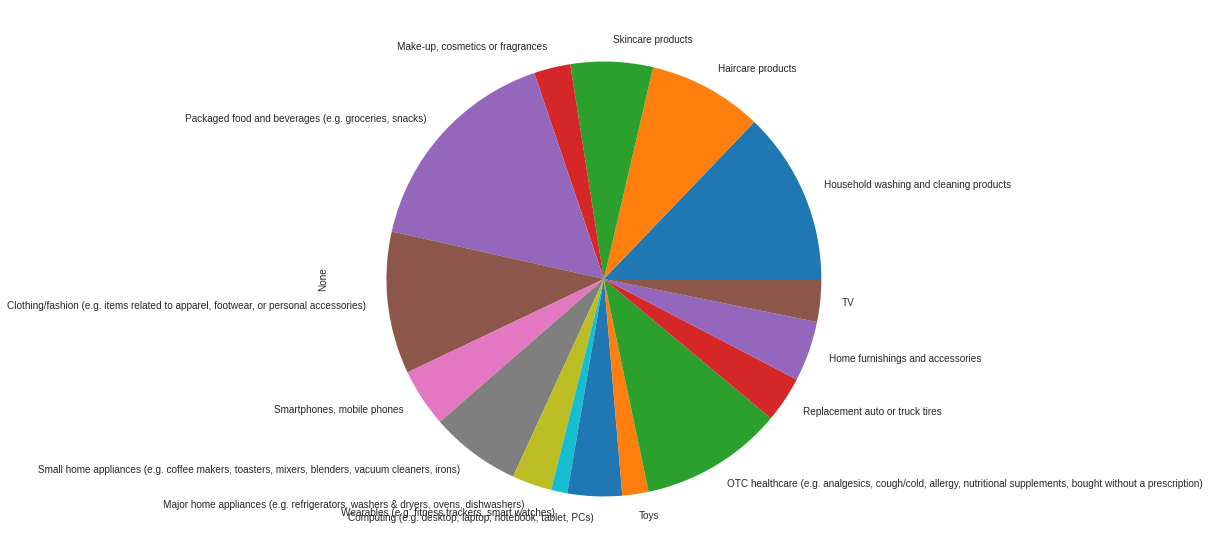

In [27]:
d.plot.pie(figsize=(20,10))